## Anomaly/Outlier Detection 

What Is Anomaly Detection?

Anomaly detection is a method used to detect something that doesn’t fit the normal behavior of a dataset. In other words, anomaly detection finds data points in a dataset that deviates from the rest of the data.

Those unusual things are called outliers, peculiarities, exceptions, surprise and etc.

### Different Types of Anomalies:

* Point anomalies – if a data point is too far from the rest, it falls into the category of point anomalies. The above example of bank transaction illustrates point anomalies.
* Contextual anomalies – If the event is anomalous for specific circumstances (context), then we have contextual anomalies. As data becomes more and more complex, it is vital to use anomaly detection methods for the context. This anomaly type is common in time-series data. Example – spending $10 on ice-cream every day during the hot months is normal, but is odd for the rest months.
* Collective anomalies. The collective anomaly denotes a collection of anomalous with respect to the whole dataset, but not individual objects. Example: breaking rhythm in ECG (Electrocardiogram).

### Supervised
Training data is labeled with “nominal” or “anomaly”.

The supervised setting is the ideal setting. It is the instance when a dataset comes neatly prepared for the data scientist with all data points labeled as anomaly or nominal. In this case, all anomalous points are known ahead of time. That means there are sets of data points that are anomalous, but are not identified as such for the model to train on.

Popular ML algorithms for structured data:

* Support vector machine learning
* k-nearest neighbors (KNN)
* Bayesian networks
* Decision trees

### Unsupervised
In Unsupervised settings, the training data is unlabeled and consists of “nominal” and “anomaly” points.

The hardest case, and the ever-increasing case for modelers in the ever-increasing amounts of dark data, is the unsupervised instance. The datasets in the unsupervised case do not have their parts labeled as nominal or anomalous. There is no ground truth from which to expect the outcome to be. The model must show the modeler what is anomalous and what is nominal.

<i>“The most common tasks within unsupervised learning are clustering, representation learning, and density estimation. In all of these cases, we wish to learn the inherent structure of our data without using explicitly-provided labels.”- Devin Soni</i>

Popular ML Algorithms for unstructured data are:

* Self-organizing maps (SOM)
* K-means
* C-means
* Expectation-maximization meta-algorithm (EM)
* Adaptive resonance theory (ART)
* One-class support vector machine

Let’s see the some of the most popular anomaly detection algorithms.

1. K-nearest neighbor: k-NN

k-NN is one of the simplest supervised learning algorithms and methods in machine learning. It stores all of the available examples and then classifies the new ones based on similarities in distance metrics.

k-NN is a famous classification algorithm and a lazy learner. What does a lazy learner mean?

K-nearest neighbor mainly stores the training data. It doesn’t do anything else during the training process. That’ s why it is lazy.

k-NN just stores the labeled training data. When new unlabeled data arrives, kNN works in 2 main steps:

Looks at the k closest training data points (the k-nearest neighbors).
Then, as it uses the k-nearest neighbors, k-NN decides how the new data should be classified.
How does k-NN know what’s closer?

It uses density-based anomaly detection methods. For continuous data (see continuous vs discrete data), the most common distance measure is the Euclidean distance. For discrete data, Hamming distance is a popular metric for the “closeness” of 2 text strings.

The pick of distance metric depends on the data.

The k-NN algorithm works very well for dynamic environments where frequent updates are needed. In addition, density-based distance measures are good solutions for identifying unusual conditions and gradual trends. This makes k-NN useful for outlier detection and defining suspicious events.

k-NN also is very good techniques for creating models that involve non-standard data types like text.

k-NN is one of the proven anomaly detection algorithms that increase the fraud detection rate. It is also one of the most known text mining algorithms out there.

It has many applications in business and finance field. For example, k-NN helps for detecting and preventing credit card fraudulent transactions.

2. Local Outlier Factor (LOF)

The LOF is a key anomaly detection algorithm based on a concept of a local density. It uses the distance between the k nearest neighbors to estimate the density.

LOF compares the local density of an item to the local densities of its neighbors. Thus one can determine areas of similar density and items that have a significantly lower density than their neighbors. These are the outliers.

To put it in other words, the density around an outlier item is seriously different from the density around its neighbors.

That is why LOF is called a density-based outlier detection algorithm. In addition, as you see, LOF is the nearest neighbors technique as k-NN.

LOF is computed on the base of the average ratio of the local reachability density of an item and its k-nearest neighbors.

3. K-means

K-means is a very popular clustering algorithm in the data mining area. It creates k groups from a set of items so that the elements of a group are more similar.

Just to recall that cluster algorithms are designed to make groups where the members are more similar. In this term, clusters and groups are synonymous.

In K-means technique, data items are clustered depending on feature similarity.

One of the greatest benefits of k-means is that it is very easy to implement. K-means is successfully implemented in the most of the usual programming languages that data science uses.

If you are going to use k-means for anomaly detection, you should take in account some things:

The user has to define the number of clusters in the early beginning.
k-means suppose that each cluster has pretty equal numbers of observations.
k-means only work with numerical data.
Is k-means supervised or unsupervised? It depends, but most data science specialists classify it as unsupervised. The reason is that, besides specifying the number of clusters, k-means “learns” the clusters on its own. k-means can be semi-supervised.

4. Support Vector Machine (SVM)

A support vector machine is also one of the most effective anomaly detection algorithms. SVM is a supervised machine learning technique mostly used in classification problems.

It uses a hyperplane to classify data into 2 different groups.

Just to recall that hyperplane is a function such as a formula for a line (e.g. y = nx + b).

SVM determines the best hyperplane that separates data into 2 classes.

To say it in another way, given labeled learning data, the algorithm produces an optimal hyperplane that categorizes the new examples.

When it comes to anomaly detection, the SVM algorithm clusters the normal data behavior using a learning area. Then, using the testing example, it identifies the abnormalities that go out of the learned area.

5. Neural Networks Based Anomaly Detection

When it comes to modern anomaly detection algorithms, we should start with neural networks.

Artificial neural networks are quite popular algorithms initially designed to mimic biological neurons.

The primary goal of creating a system of artificial neurons is to get systems that can be trained to learn some data patterns and execute functions like classification, regression, prediction and etc.

Building a recurrent neural network that discovers anomalies in time series data is a hot topic in data mining world today.

What makes them very helpful for anomaly detection in time series is this power to find out dependent features in multiple time steps.

There are many different types of neural networks and they have both supervised and unsupervised learning algorithms. Example of how neural networks can be used for anomaly detection, you can see here.

The above 5 anomaly detection algorithms are the key ones. However, there are other techniques. Here is a more comprehensive list of techniques and algorithms.

[Source](https://www.intellspot.com/anomaly-detection-algorithms/)

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import date
%matplotlib inline

In [9]:
data = pd.read_csv('data/data.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
data.InvoiceDate = pd.to_datetime(data.InvoiceDate)

In [10]:
# Sort by date and select first 100 000 elements
df = data.sort_values(by=["InvoiceDate"])[:100001]

### Z-Score (Similar Techniques: IQR based, Percentile based)

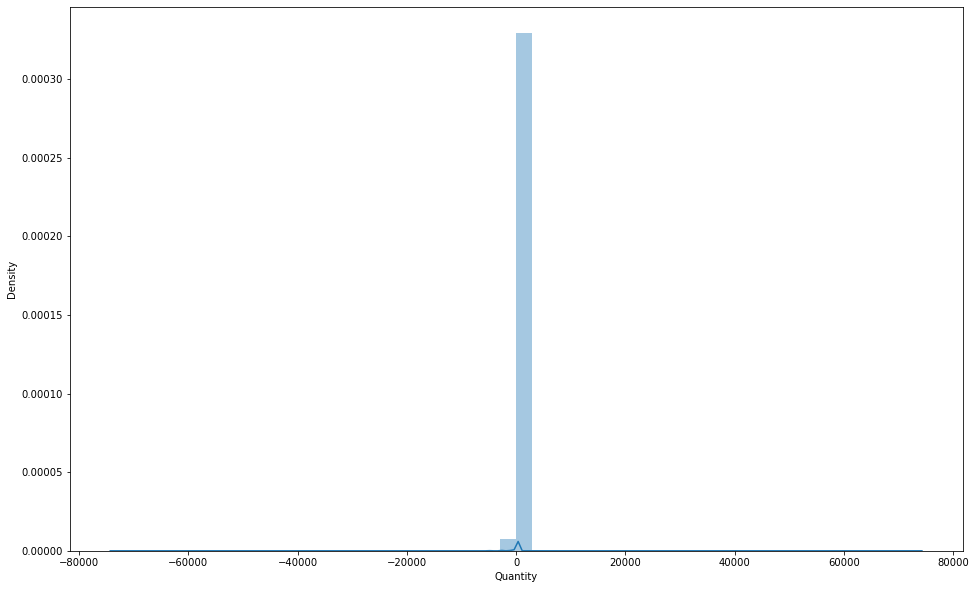

In [23]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16, 10))
sns.distplot(df.Quantity)
plt.show()

In [30]:
# z-score with mean or median
upper_limit = df.Quantity.mean() + 3*df.Quantity.std()
lower_limit = df.Quantity.mean() - 3*df.Quantity.std()

In [31]:
print("Highest allowed",upper_limit)
print("Lowest allowed",lower_limit)

Highest allowed 1016.9890886805896
Lowest allowed -998.5169134023423


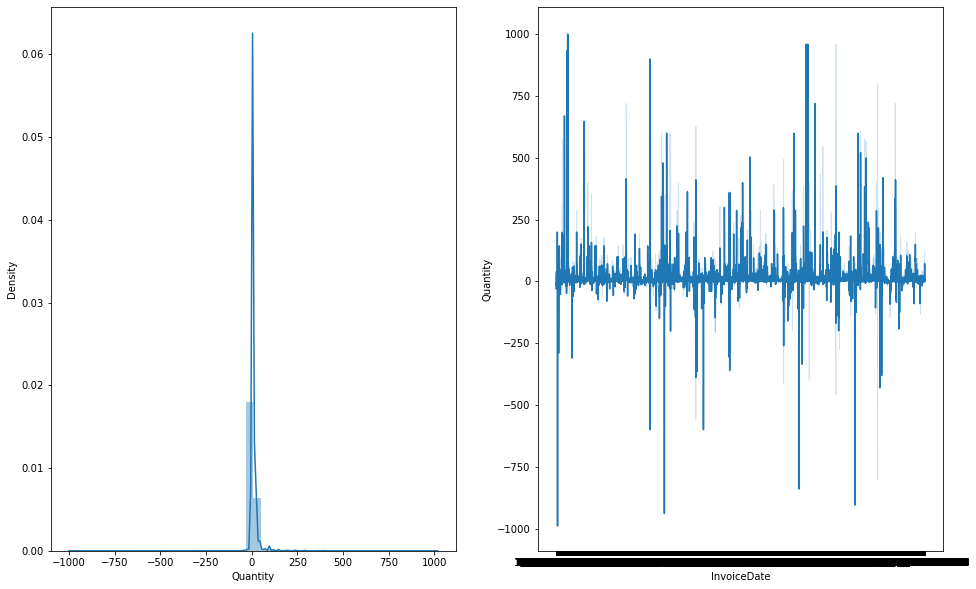

In [32]:
outlier_free_df = df[(df.Quantity < upper_limit) & (df.Quantity > lower_limit)]
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16, 10))
plt.subplot(1,2,1)
sns.distplot(outlier_free_df.Quantity)
plt.subplot(1,2,2)
sns.lineplot(outlier_free_df.InvoiceDate, outlier_free_df.Quantity)
plt.show()

### DBSCAN

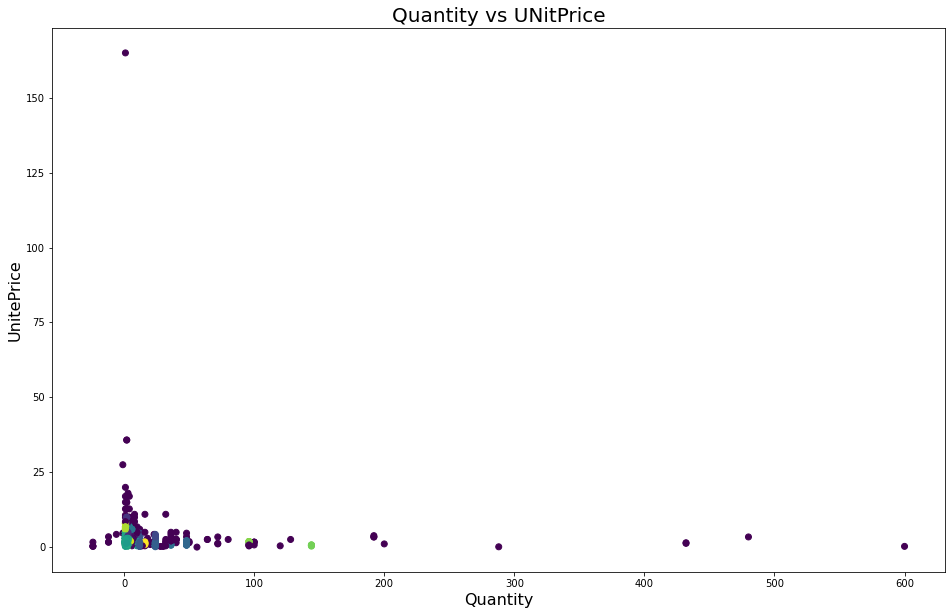

In [70]:
from sklearn.cluster import DBSCAN

dbscan_data = data[['Quantity', 'UnitPrice']][:1000]

# DBSCAN model with parameters
model = DBSCAN().fit(dbscan_data)

# Scatter plot function
colors = model.labels_
plt.figure(figsize=(16, 10))
plt.scatter(dbscan_data.Quantity, dbscan_data.UnitPrice, c=colors)
plt.xlabel('Quantity', fontsize=16)
plt.ylabel('UnitePrice', fontsize=16)
plt.title('Quantity vs UNitPrice', fontsize=20)
plt.show()